In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report
import pickle

In [2]:
dataset=pd.read_csv("Diabetes.csv")

In [3]:
dataset.shape

(253680, 22)

In [4]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
dataset.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
dataset.duplicated().sum()

24206

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
patients_with_diabetes=dataset[dataset['Diabetes_binary']==1]
patients_without_diabetes=dataset[dataset['Diabetes_binary']==0]
print("patients_with_diabetes",len(patients_with_diabetes))
print("patients_without_diabetes",len(patients_without_diabetes))

patients_with_diabetes 35097
patients_without_diabetes 194377


[Text(0, 0, '35097'), Text(0, 0, '194377')]

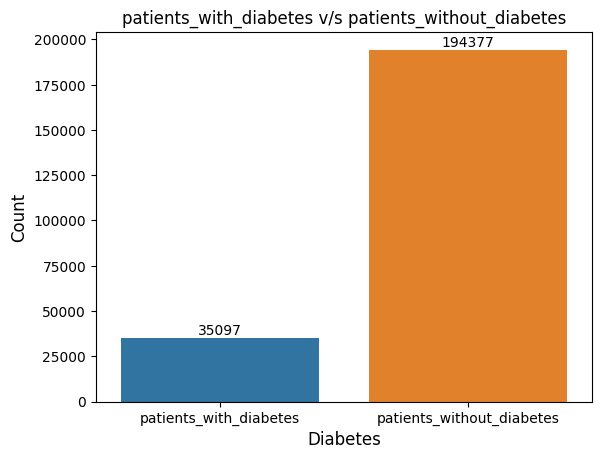

In [11]:
ax=sns.barplot(x=['patients_with_diabetes','patients_without_diabetes'],y=[len(patients_with_diabetes),len(patients_without_diabetes)])
plt.title("patients_with_diabetes v/s patients_without_diabetes",size=12)
plt.xlabel("Diabetes",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

# Oversampling

In [12]:
new_patients_with_diabetes=patients_with_diabetes.sample(len(patients_without_diabetes),replace=True)
dataset1=pd.concat([patients_without_diabetes,new_patients_with_diabetes])

In [13]:
patients_with_diabetes=dataset1[dataset1['Diabetes_binary']==1]
patients_without_diabetes=dataset1[dataset1['Diabetes_binary']==0]
print("patients_with_diabetes",len(patients_with_diabetes))
print("patients_without_diabetes",len(patients_without_diabetes))

patients_with_diabetes 194377
patients_without_diabetes 194377


[Text(0, 0, '194377'), Text(0, 0, '194377')]

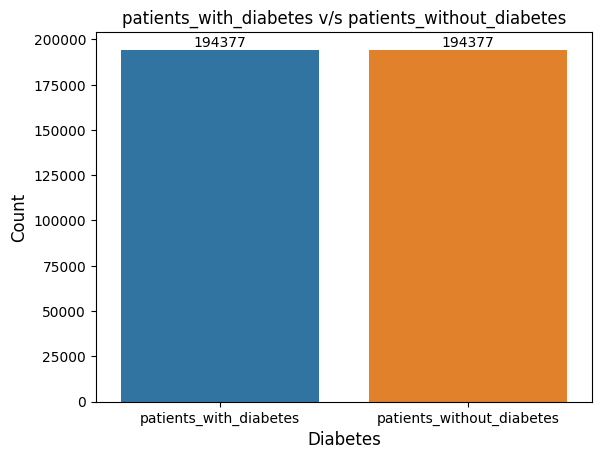

In [14]:
ax=sns.barplot(x=['patients_with_diabetes','patients_without_diabetes'],y=[len(patients_with_diabetes),len(patients_without_diabetes)])
plt.title("patients_with_diabetes v/s patients_without_diabetes",size=12)
plt.xlabel("Diabetes",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

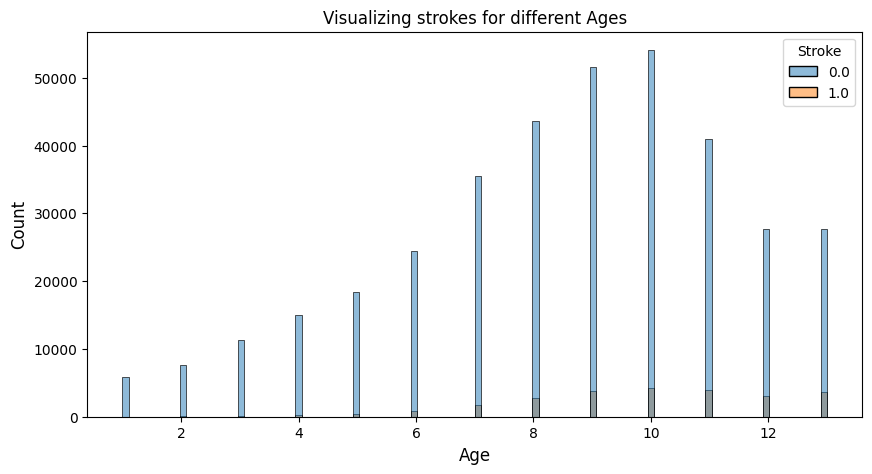

In [15]:
plt.figure(figsize=(10,5))
ax=sns.histplot(x=dataset1['Age'],hue=dataset1['Stroke'])
plt.title("Visualizing strokes for different Ages")
plt.xlabel("Age",size=12)
plt.ylabel("Count",size=12)
plt.show()

0 = female 1 = male

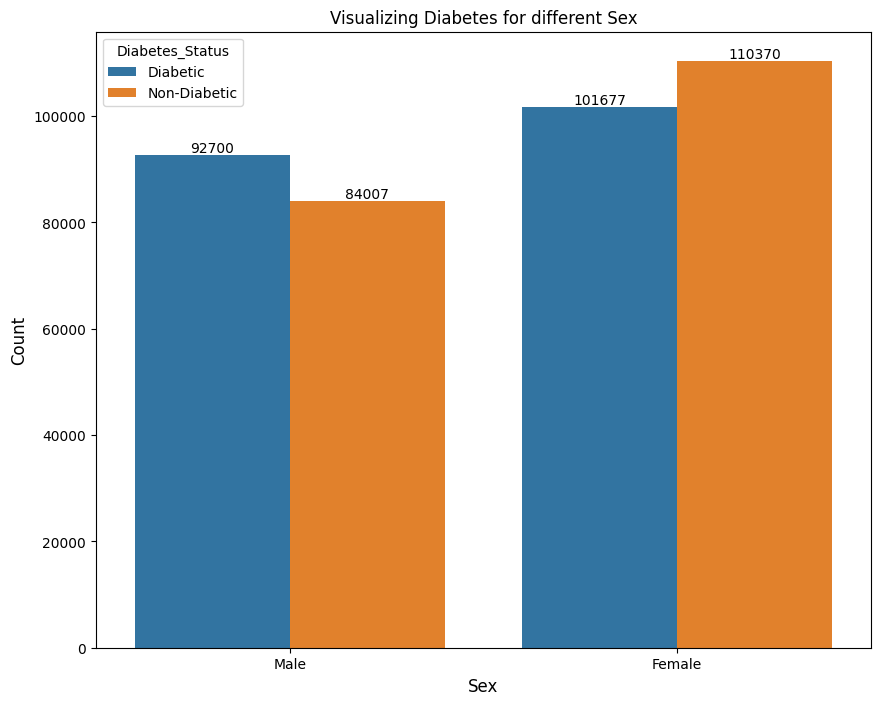

In [16]:
male=dataset1[dataset1['Sex']==1]
female=dataset1[dataset1['Sex']==0]
male_diabetes_count = male['Diabetes_binary'].value_counts()
female_diabetes_count = female['Diabetes_binary'].value_counts()

# Create a DataFrame to use with seaborn
data = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Diabetic': [male_diabetes_count[1], female_diabetes_count[1]],
    'Non-Diabetic': [male_diabetes_count[0], female_diabetes_count[0]]
})

# Melt the data for easier plotting
data_melted = data.melt(id_vars='Sex', var_name='Diabetes_Status', value_name='Count')

# Create the plot
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Sex', y='Count', hue='Diabetes_Status', data=data_melted)
plt.title("Visualizing Diabetes for different Sex")
plt.xlabel("Sex", size=12)
plt.ylabel("Count", size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

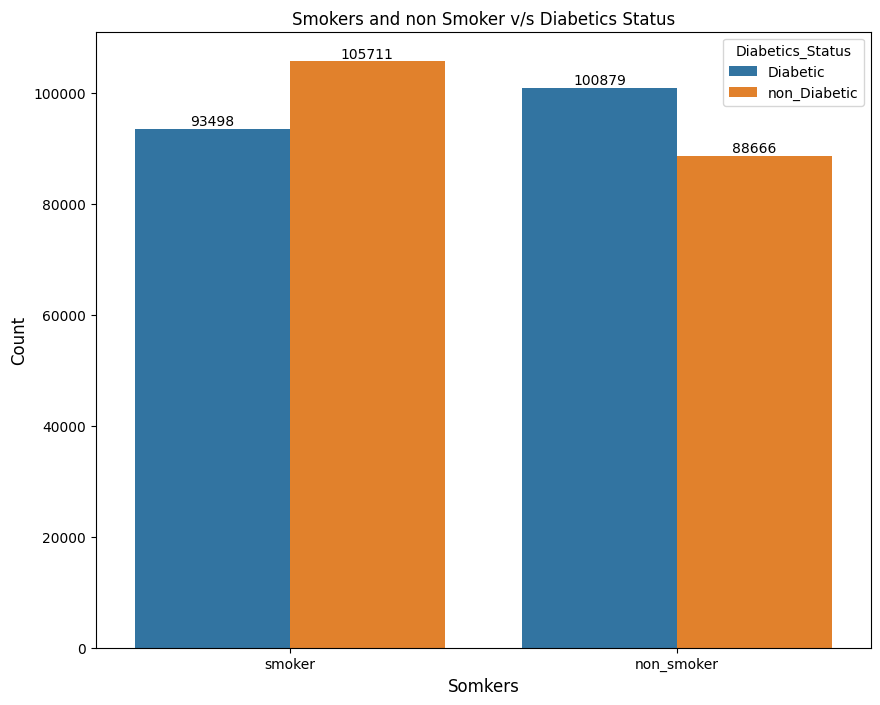

In [17]:
smoker=dataset1[dataset1["Smoker"]==0]
non_smoker=dataset1[dataset1['Smoker']==1]

smoker_diabetes_count = smoker['Diabetes_binary'].value_counts()
non_smoker_diabetes_count = non_smoker['Diabetes_binary'].value_counts()

data=pd.DataFrame({
    "Smoker":["smoker","non_smoker"],
    "Diabetic":[smoker_diabetes_count[1],non_smoker_diabetes_count[1]],
    "non_Diabetic":[smoker_diabetes_count[0],non_smoker_diabetes_count[0]]
})

data_melt=data.melt(id_vars="Smoker",var_name="Diabetics_Status",value_name='Count')

plt.figure(figsize=(10,8))
ax=sns.barplot(x="Smoker",y='Count',hue='Diabetics_Status',data=data_melt)
plt.title("Smokers and non Smoker v/s Diabetics Status")
plt.xlabel("Somkers", size=12)
plt.ylabel("Count", size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [18]:
data=dataset1.drop(columns=['Diabetes_binary','Age'])
target=dataset1['Diabetes_binary']

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.1)

In [20]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (349878, 20)
The shape of ytrain is (349878,)
The shape of xtest is (38876, 20)
The shape of ytest is (38876,)


# Linear Regression

BY using LinearRegression Algorithm we get the accuray of 26.78%
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     19314
         1.0       0.91      0.03      0.05     19562

    accuracy                           0.51     38876
   macro avg       0.70      0.51      0.36     38876
weighted avg       0.71      0.51      0.36     38876



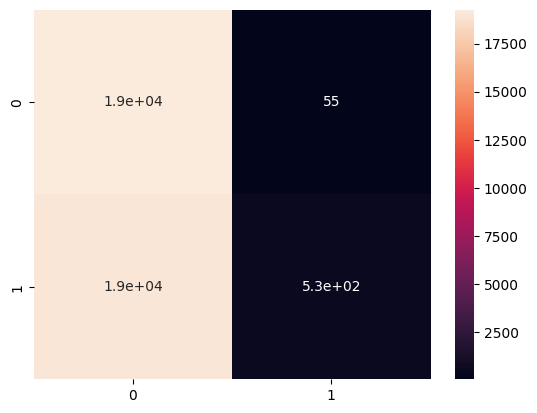

In [21]:
model_lr=LinearRegression()
model_lr.fit(xtrain,ytrain)
result=model_lr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using LinearRegression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Logistic Regression

C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BY using Logistic Regression Algorithm we get the accuray of 72.47%
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72     19314
         1.0       0.72      0.73      0.73     19562

    accuracy                           0.72     38876
   macro avg       0.72      0.72      0.72     38876
weighted avg       0.72      0.72      0.72     38876



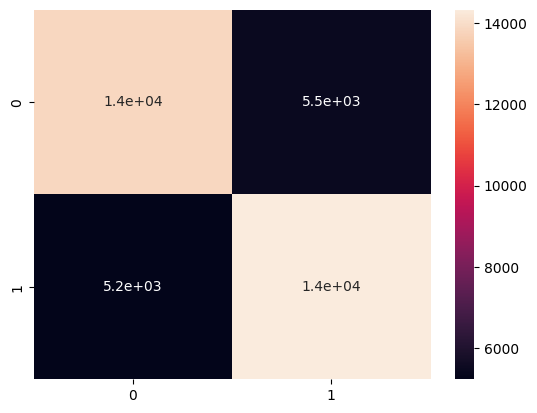

In [22]:
model_lrr=LogisticRegression()
model_lrr.fit(xtrain,ytrain)
result=model_lrr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lrr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Logistic Regression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 90.91%
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90     19314
         1.0       0.86      0.98      0.92     19562

    accuracy                           0.91     38876
   macro avg       0.92      0.91      0.91     38876
weighted avg       0.92      0.91      0.91     38876



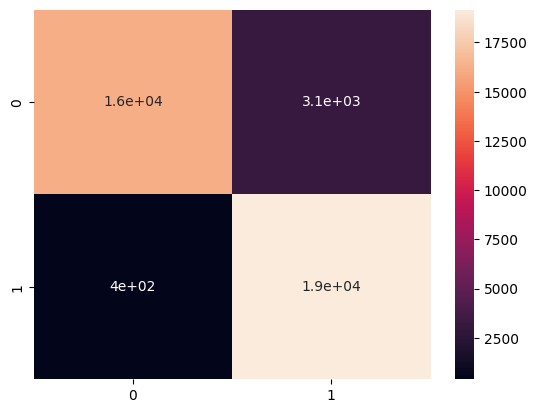

In [23]:
model_dt=DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)
result=model_dt.score(xtest,ytest)
accuracy=result*100
predicted_values=model_dt.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Decision Tree Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 93.46%
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93     19314
         1.0       0.90      0.98      0.94     19562

    accuracy                           0.93     38876
   macro avg       0.94      0.93      0.93     38876
weighted avg       0.94      0.93      0.93     38876



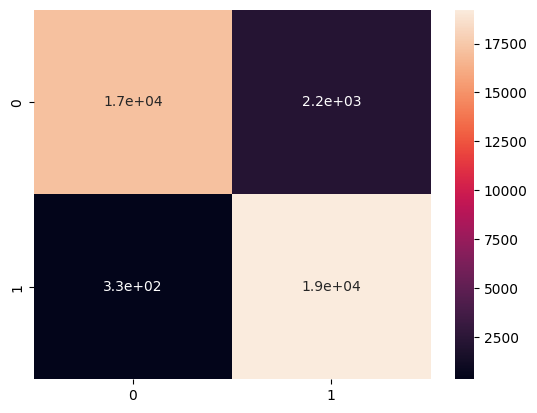

In [24]:
model_rf=RandomForestClassifier()
model_rf.fit(xtrain,ytrain)
result=model_rf.score(xtest,ytest)
accuracy=result*100
predicted_values=model_rf.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Random Forest Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# knn

BY using knn Algorithm we get the accuray of 82.61%
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80     19314
         1.0       0.76      0.95      0.85     19562

    accuracy                           0.83     38876
   macro avg       0.85      0.83      0.82     38876
weighted avg       0.85      0.83      0.82     38876



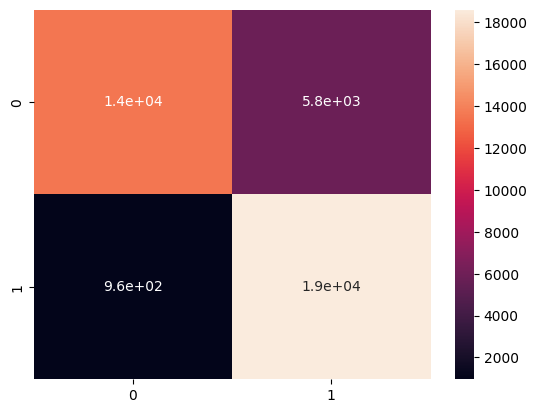

In [26]:
model_knn=KNeighborsClassifier()
model_knn.fit(xtrain,ytrain)
result=model_knn.score(xtest,ytest)
accuracy=result*100
predicted_values=model_knn.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using knn Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# xgboost

BY using xgboost Algorithm we get the accuray of 74.07%
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     19314
         1.0       0.73      0.78      0.75     19562

    accuracy                           0.74     38876
   macro avg       0.74      0.74      0.74     38876
weighted avg       0.74      0.74      0.74     38876



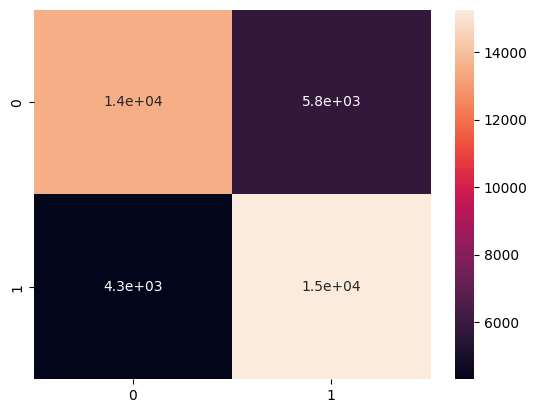

In [27]:
model_xgb=xgb.XGBClassifier(learning_rate=0.1)
model_xgb.fit(xtrain,ytrain)
result=model_xgb.score(xtest,ytest)
accuracy=result*100
predicted_values=model_xgb.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using xgboost Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '26.78'),
 Text(0, 0, '72.47'),
 Text(0, 0, '90.91'),
 Text(0, 0, '93.46'),
 Text(0, 0, '82.61'),
 Text(0, 0, '74.07')]

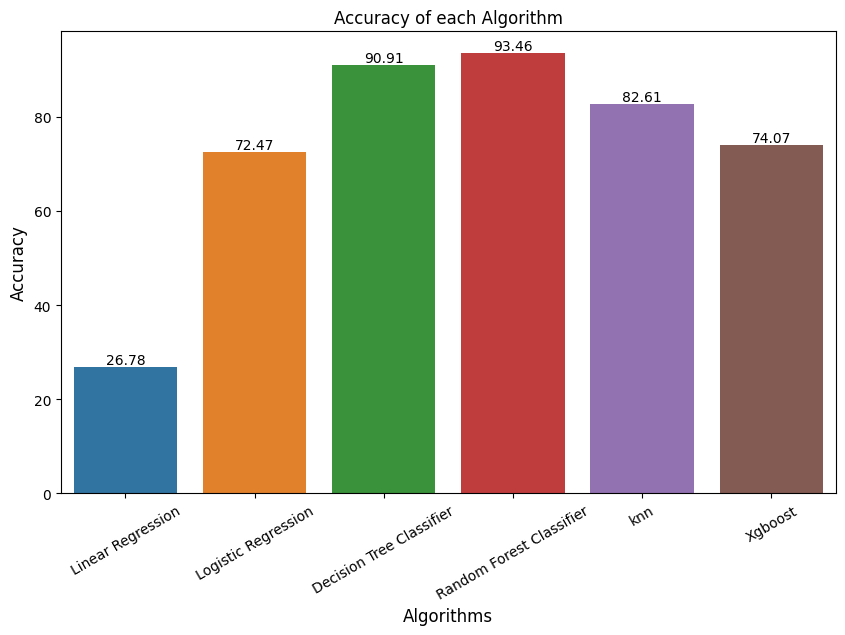

In [28]:
plt.subplots(figsize=(10,6))
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","knn","Xgboost"],y=[26.78,72.47,90.91,93.46,82.61,74.07])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

In [29]:
pickle.dump(model_rf,open("Diabetes.pkl","wb"))